In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [3]:
df = pd.read_csv("project_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,last_name,first_name,player_id,year,player_age,p_game,p_formatted_ip,p_total_pa,p_total_hits,p_k_percent,...,straightaway_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,n_fastball_formatted,n_breaking_formatted,n_offspeed_formatted
0,Wainwright,Adam,425794,2020,39,10,65.2,262,54,20.6,...,39.8,20.9,67.6,44.0,21.5,27.7,6.8,59.2,38.3,2.5
1,Greinke,Zack,425844,2020,37,12,67.0,273,67,24.5,...,42.3,26.0,61.9,42.9,18.9,30.6,7.7,43.5,33.2,23.3
2,Lester,Jon,452657,2020,36,12,61.0,265,64,15.8,...,41.4,23.2,58.9,48.3,23.2,23.6,4.9,73.7,12.8,13.5
3,Scherzer,Max,453286,2020,36,12,67.1,295,70,31.2,...,32.4,33.0,65.8,34.6,22.3,34.1,8.9,55.6,28.4,16.1
4,Cueto,Johnny,456501,2020,34,12,63.1,277,61,20.2,...,31.3,20.3,55.6,42.7,22.4,30.2,4.7,43.7,29.2,27.1


In [4]:
# Set features. This will also be used as your x values.
selected_features = df[['player_age', 'p_game', 'p_formatted_ip', 'p_total_pa', 'p_total_hits', 'p_k_percent',\
                       'p_bb_percent', 'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent', 'oz_swing_miss_percent',\
                        'oz_contact_percent', 'out_zone_percent', 'meatball_percent', 'iz_contact_percent', 'in_zone_percent',\
                        'edge_percent', 'whiff_percent', 'swing_percent', 'pull_percent', 'straightaway_percent',\
                        'opposite_percent', 'f_strike_percent', 'groundballs_percent', 'flyballs_percent', 'linedrives_percent',\
                        'popups_percent', 'n_fastball_formatted', 'n_breaking_formatted', 'n_offspeed_formatted' ]]

In [5]:
X = selected_features
y = df[['p_out']]
print(X.shape, y.shape)

(323, 30) (323, 1)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
model.fit(X_train, y_train)
print(model)

LinearRegression()


In [9]:
score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.9999774860704179


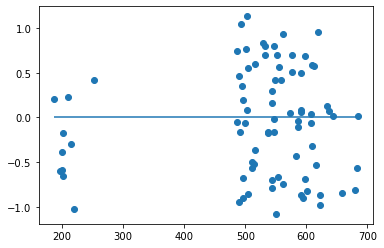

In [10]:
predictions = model.predict(X_test)
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()